<a href="https://colab.research.google.com/github/zhuan0122/Machine_Learing_Handson_Python_in_Data_science/blob/master/reinforcement_learning_upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [21]:
import math
N=700 # the original rounds is 10000
d=10
ad_selected=[]
number_of_selection=[0]*d
sum_of_rewards=[0]*d
total_rewrad=0
for n in range(0,N):
  ad=0 # initialize the selected ad index
  max_upper_bound=0 # initialize the maximum upper confidence bound. UCB alogorthm is selecting the ad with max UCB
  for i in range(0,d):
    # check if the current ad i is selected or not since we initialize none of ad is selected 
    if (number_of_selection[i]>0):
      avarage_reward=sum_of_rewards[i]/number_of_selection[i]
      delta_i=math.sqrt((3/2)*(math.log((n+1))/number_of_selection[i]))
      upper_bound=avarage_reward+delta_i
    else:
      # we should consider the case that the current ad i is not selected. and it did in this case we initialed all ads are not selected 
      upper_bound=1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i # ad is selected when the ucb is hihest 
  ad_selected.append(ad) # append all selected ad, totally 10000 elements 
  number_of_selection[ad] = number_of_selection[ad]+1
  sum_of_rewards[ad]=sum_of_rewards[ad]+dataset.values[n,ad]
  total_rewrad=total_rewrad+dataset.values[n,ad]


## Visualising the results

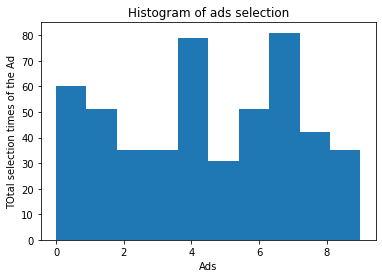

In [22]:
# visulaize the highest selected ads which also display the highest UCB and also display the highest TCR total clcick rate 
plt.hist(ad_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('TOtal selection times of the Ad')
plt.show()

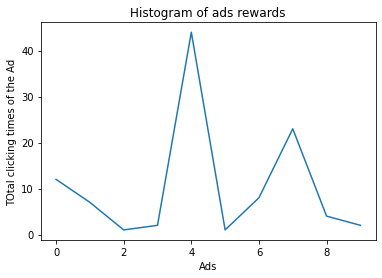

In [19]:
# visualize the ads with different total rewards, which should give the same result as the ads selected 
plt.plot(sum_of_rewards)
plt.title('Histogram of ads rewards')
plt.xlabel('Ads')
plt.ylabel('TOtal clicking times of the Ad')
plt.show()

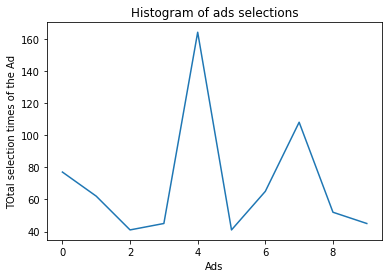

In [20]:
# visualize the ads with different total selection, which should give the same result as the ads selected 
plt.plot(number_of_selection)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('TOtal selection times of the Ad')
plt.show()

In [12]:
## since the goal of UCB reinforcement learning is finding the best ads with biggest TCR as fast as possible. it did the expoitation 
## while exploration. so we could change the N values, try to reduce it to see if we gonna get the highest selected ad which is far from 
## others during less rounds

In [7]:
print(sum_of_rewards)

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]


In [8]:
print(ad_selected)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2, 8, 3, 5, 9, 9, 9, 9, 4, 0, 1, 